In [1]:
import pandas as pd

In [2]:
# Load The Fault Test and Train dataset
path = "/kaggle/input/tep-dataset-1-5-gb-csv/faulty_testing.csv"
FTS  =  pd.read_csv (path)
path1 = "/kaggle/input/tep-dataset-1-5-gb-csv/faulty_training.csv"
FTN  =  pd.read_csv (path1)

In [3]:
# Normal Tets and Training Dataset
path11 = "/kaggle/input/tep-dataset-1-5-gb-csv/normal_training.csv"
NTN  =  pd.read_csv (path11)

path12 = "/kaggle/input/tep-dataset-1-5-gb-csv/normal_testing.csv"
NTS  =  pd.read_csv (path12)


In [4]:
missing_data = FTS.isnull().sum() 
#missing_data = FTN.isnull().sum() 
#missing_data = NTN.isnull().sum() 
#missing_data = NTS.isnull().sum() 

print("Missing Data:")
print(missing_data)

Missing Data:
faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            

In [5]:

df_NTT = pd.DataFrame(FTN)
df_FTT = pd.DataFrame(NTN)

NTFTN_500 = pd.concat([df_NTT, df_FTT], axis=0, ignore_index=True)

NTFTN_500 = NTFTN_500[(NTFTN_500['simulationRun'] >= 1) & (NTFTN_500['simulationRun'] <= 50)]

NTFTN_500 = NTFTN_500[NTFTN_500['faultNumber'] != 3]
NTFTN_500 = NTFTN_500[NTFTN_500['faultNumber'] != 9]
NTFTN_500 = NTFTN_500[NTFTN_500['faultNumber'] != 15]

NTFTN_500 = NTFTN_500[(NTFTN_500['sample'] >= 20) & (NTFTN_500['sample'] <= 500)]

NTFT500_train_features = NTFTN_500.iloc[::, 3:55]

NTFT500_train_lable = NTFTN_500.iloc[::, 0]

print(NTFTN_500.shape)

(432900, 55)


In [6]:
df_NTTS = pd.DataFrame(NTS)
df_FTTS = pd.DataFrame(FTS)

NTFTS_500 = pd.concat([df_NTTS, df_FTTS], axis=0, ignore_index=True)

NTS50 = NTFTS_500[(NTFTS_500['simulationRun'] >= 1) & (NTFTS_500['simulationRun'] <= 10)]

NTS50 = NTS50[NTS50['faultNumber'] != 3]
NTS50 = NTS50[NTS50['faultNumber'] != 9]
NTS50 = NTS50[NTS50['faultNumber'] != 15]

NTFTS50 = NTS50[(NTS50['sample'] >= 160) & (NTS50['sample'] <= 961)]

NTFTS50_test_features = NTFTS50.iloc[::, 3:55]

NTFTS50_test_lable = NTFTS50.iloc[::, 0]
NTFTS50.faultNumber.value_counts()
#print(NTS50.shape)

faultNumber
0     8010
1     8010
19    8010
18    8010
17    8010
16    8010
14    8010
13    8010
12    8010
11    8010
10    8010
8     8010
7     8010
6     8010
5     8010
4     8010
2     8010
20    8010
Name: count, dtype: int64

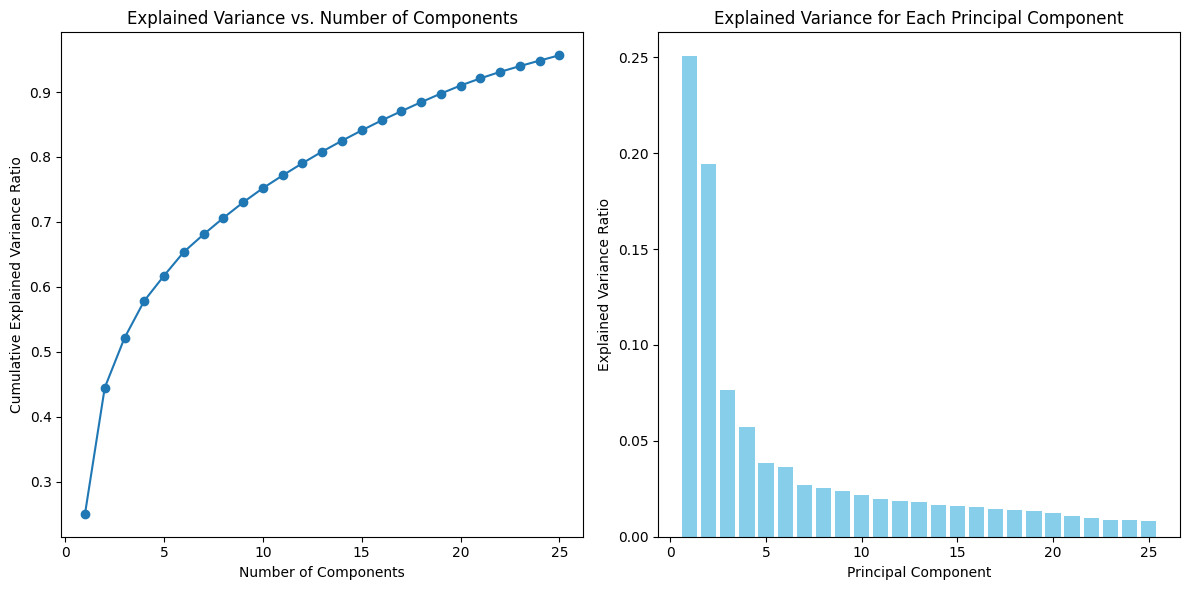

Explained Variance for PCA1: 0.2505
Explained Variance for PCA2: 0.1943
Explained Variance for PCA3: 0.0766
Explained Variance for PCA4: 0.0572
Explained Variance for PCA5: 0.0387
Explained Variance for PCA6: 0.0365
Explained Variance for PCA7: 0.0270
Explained Variance for PCA8: 0.0254
Explained Variance for PCA9: 0.0239
Explained Variance for PCA10: 0.0219
Explained Variance for PCA11: 0.0196
Explained Variance for PCA12: 0.0188
Explained Variance for PCA13: 0.0179
Explained Variance for PCA14: 0.0167
Explained Variance for PCA15: 0.0160
Explained Variance for PCA16: 0.0152
Explained Variance for PCA17: 0.0142
Explained Variance for PCA18: 0.0139
Explained Variance for PCA19: 0.0133
Explained Variance for PCA20: 0.0125
Explained Variance for PCA21: 0.0110
Explained Variance for PCA22: 0.0100
Explained Variance for PCA23: 0.0089
Explained Variance for PCA24: 0.0085
Explained Variance for PCA25: 0.0082
Reconstruction Error (Mean Squared Error): 0.0434


In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(NTFT500_train_features)

# Specify the desired number of components
n_components = 25

# Perform PCA
pca_train = PCA(n_components=n_components)
pca_result_train = pca_train.fit_transform(scaled_data)

# Plot the Explained Variance vs. Number of Components
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_components + 1), np.cumsum(pca_train.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')

# Plot the Explained Variance for Each Principal Component
plt.subplot(1, 2, 2)
plt.bar(range(1, n_components + 1), pca_train.explained_variance_ratio_, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for Each Principal Component')
plt.tight_layout()
plt.show()

# Print the explained variance of each principal component
for i, ratio in enumerate(pca_train.explained_variance_ratio_, 1):
    print(f"Explained Variance for PCA{i}: {ratio:.4f}")

reconstructed_data = pca_train.inverse_transform(pca_result_train)
mse = np.mean(np.square(scaled_data - reconstructed_data))

print(f"Reconstruction Error (Mean Squared Error): {mse:.4f}")

In [8]:
explained_variance_ratio = pca_train.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
for i, cumulative_ratio in enumerate(cumulative_explained_variance, 1):
    print(f"Cumulative Explained Variance up to PCA{i}: {cumulative_ratio:.4f}")

Cumulative Explained Variance up to PCA1: 0.2505
Cumulative Explained Variance up to PCA2: 0.4448
Cumulative Explained Variance up to PCA3: 0.5214
Cumulative Explained Variance up to PCA4: 0.5786
Cumulative Explained Variance up to PCA5: 0.6173
Cumulative Explained Variance up to PCA6: 0.6538
Cumulative Explained Variance up to PCA7: 0.6808
Cumulative Explained Variance up to PCA8: 0.7062
Cumulative Explained Variance up to PCA9: 0.7301
Cumulative Explained Variance up to PCA10: 0.7520
Cumulative Explained Variance up to PCA11: 0.7716
Cumulative Explained Variance up to PCA12: 0.7904
Cumulative Explained Variance up to PCA13: 0.8083
Cumulative Explained Variance up to PCA14: 0.8250
Cumulative Explained Variance up to PCA15: 0.8410
Cumulative Explained Variance up to PCA16: 0.8562
Cumulative Explained Variance up to PCA17: 0.8705
Cumulative Explained Variance up to PCA18: 0.8843
Cumulative Explained Variance up to PCA19: 0.8976
Cumulative Explained Variance up to PCA20: 0.9100
Cumulativ

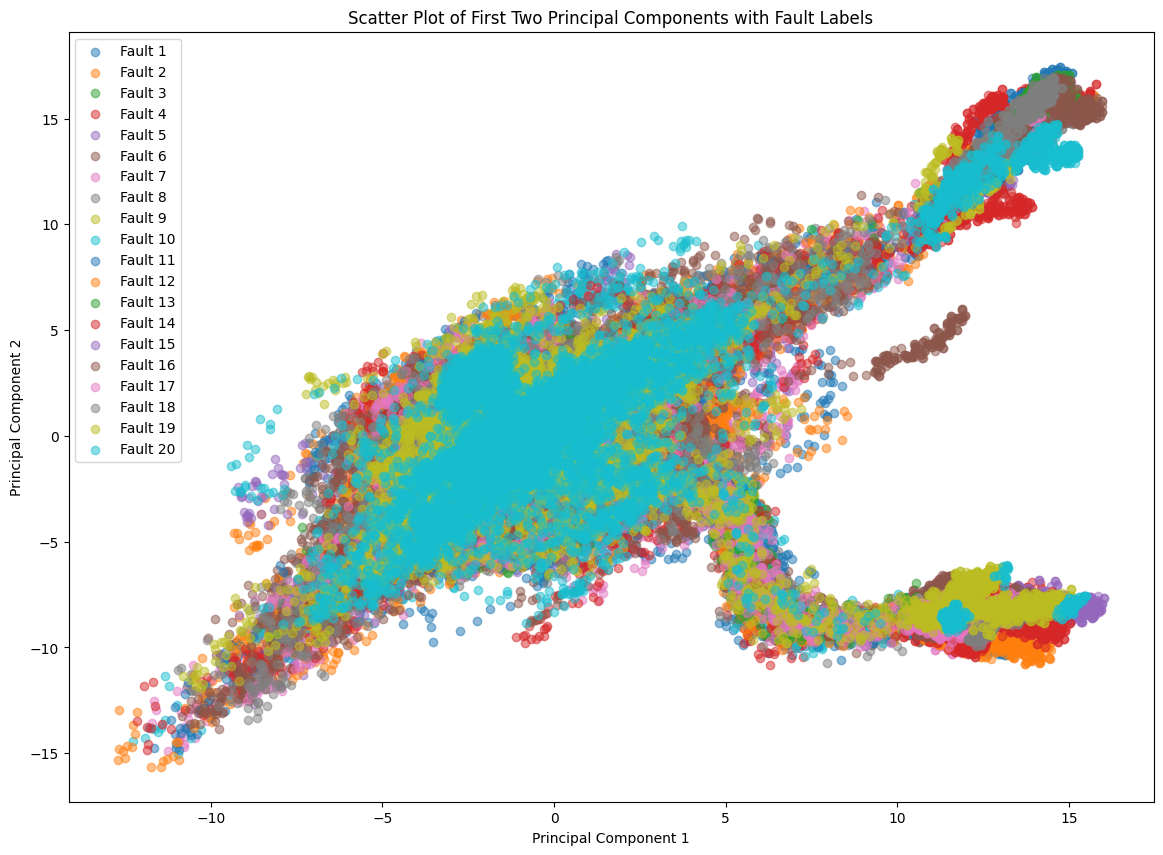

In [9]:
plt.figure(figsize=(14, 10))
for fault_number in range(1, 21):  # Assuming 20 fault numbers
    indices = NTFTN_500[NTFTN_500['faultNumber'] == fault_number].index
    
    # Check if indices are within the valid range
    valid_indices = indices[indices < pca_result_train.shape[0]]
    
    plt.scatter(
        pca_result_train[valid_indices, 0],
        pca_result_train[valid_indices, 1],
        label=f'Fault {fault_number}',
        alpha=0.5
    )

plt.title('Scatter Plot of First Two Principal Components with Fault Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

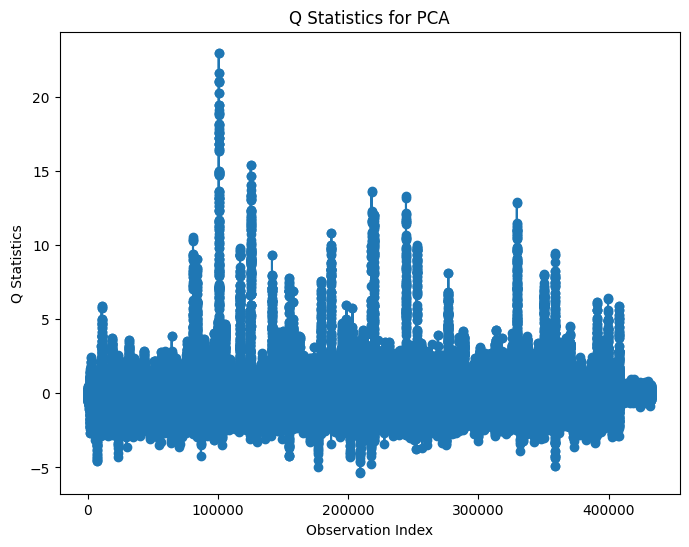

In [10]:
def calculate_q_statistics(pca, scaled_data, reconstructed_data):
    # Calculate the residuals
    residuals = scaled_data - reconstructed_data[:scaled_data.shape[0]]  # Adjust the shape of reconstructed_data
    
    # Calculate the loading matrix (transform of principal components)
    loading_matrix = pca.components_.T
    
    # Calculate the Q statistics for each observation
    q_statistics = np.sum(residuals ** 2 @ loading_matrix, axis=1)
    
    return q_statistics
q_stats = calculate_q_statistics(pca_train, scaled_data, reconstructed_data)
# Plot the Q statistics
plt.figure(figsize=(8, 6))
plt.plot(q_stats, marker='o')
plt.xlabel('Observation Index')
plt.ylabel('Q Statistics')
plt.title('Q Statistics for PCA')
plt.show()

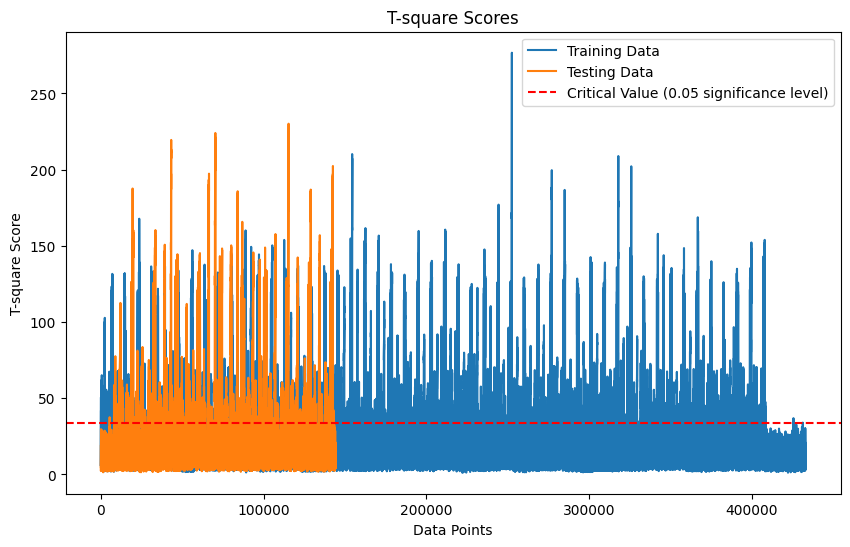

Critical Value for T-square Test: 33.9244


In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.stats import chi2


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(NTFT500_train_features)
X_test_scaled = scaler.transform(NTFTS50_test_features)

# Specify the desired number of components
n_components = 22

# Perform PCA on training data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Perform PCA on testing data
X_test_pca = pca.transform(X_test_scaled)

# Calculate T-square scores
t_square_train = np.sum((X_train_pca / np.std(X_train_pca, axis=0)) ** 2, axis=1)
t_square_test = np.sum((X_test_pca / np.std(X_train_pca, axis=0)) ** 2, axis=1)

# Set significance level for Hotelling's T-square test
alpha = 0.05

# Calculate critical value for Hotelling's T-square test
df = n_components
critical_value = chi2.ppf(1 - alpha, df)

# Plot T-square scores
plt.figure(figsize=(10, 6))
plt.plot(t_square_train, label='Training Data')
plt.plot(t_square_test, label='Testing Data')
plt.axhline(critical_value, color='r', linestyle='--', label=f'Critical Value ({alpha} significance level)')
plt.title('T-square Scores')
plt.xlabel('Data Points')
plt.ylabel('T-square Score')
plt.legend()
plt.show()
print(f'Critical Value for T-square Test: {critical_value:.4f}')


### TEST DATASET PCA

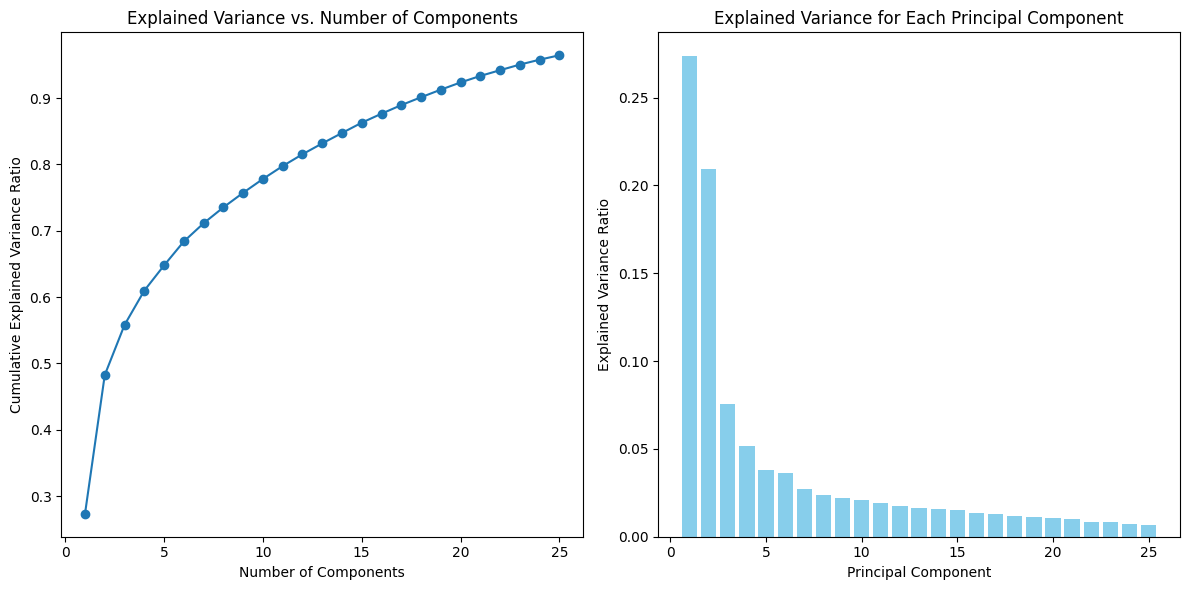

Explained Variance for PCA1: 0.2734
Explained Variance for PCA2: 0.2091
Explained Variance for PCA3: 0.0755
Explained Variance for PCA4: 0.0517
Explained Variance for PCA5: 0.0380
Explained Variance for PCA6: 0.0361
Explained Variance for PCA7: 0.0274
Explained Variance for PCA8: 0.0240
Explained Variance for PCA9: 0.0220
Explained Variance for PCA10: 0.0208
Explained Variance for PCA11: 0.0195
Explained Variance for PCA12: 0.0177
Explained Variance for PCA13: 0.0164
Explained Variance for PCA14: 0.0157
Explained Variance for PCA15: 0.0155
Explained Variance for PCA16: 0.0136
Explained Variance for PCA17: 0.0129
Explained Variance for PCA18: 0.0118
Explained Variance for PCA19: 0.0114
Explained Variance for PCA20: 0.0109
Explained Variance for PCA21: 0.0098
Explained Variance for PCA22: 0.0087
Explained Variance for PCA23: 0.0085
Explained Variance for PCA24: 0.0074
Explained Variance for PCA25: 0.0067


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(NTFTS50_test_features)

# Specify the desired number of components
n_components = 25

# Perform PCA
pca_test = PCA(n_components=n_components)
pca_result_test = pca_test.fit_transform(scaled_data)

# Plot the Explained Variance vs. Number of Components
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_components + 1), np.cumsum(pca_test.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')

# Plot the Explained Variance for Each Principal Component
plt.subplot(1, 2, 2)
plt.bar(range(1, n_components + 1), pca_test.explained_variance_ratio_, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for Each Principal Component')
plt.tight_layout()
plt.show()

# Print the explained variance of each principal component
for i, ratio in enumerate(pca_test.explained_variance_ratio_, 1):
    print(f"Explained Variance for PCA{i}: {ratio:.4f}")


In [13]:
PCA_train = pd.DataFrame(pca_result_train)
PCA_test =  pd.DataFrame(pca_result_test)

In [14]:
#print(PCA_test)
#pca_test.head()

### Logistic Regression Code

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Accuracy: 0.36

Confusion Matrix:
[[ 416    0    0  137 1942    0  289 1895  384    0  655  747   85  329
   420   49    0  662]
 [   2 7661    0    0   82  178    3   12    3    0    1   49    1    2
     3    4    0    9]
 [  22    0 7352    1  170    0   41   51   30    0   88  160    3   24
    43    5    0   20]
 [   1    0    0 2333 1509    0  227 1555    5    0  629  718    0    1
   410   52    0  570]
 [ 217    0    2   78 2725    1  240 1532  258    0  819  623   74  214
   247  213    0  767]
 [   4  384    0    0   21 7554    0   13    0    0    0    0    0    3
     3    0    0   28]
 [   1    2   60    0  588    1 6421   18    0    0  302   98    0    1
     4  227    0  287]
 [  29  658  496    7 1757  261  192 1328   30    0 1481  758   21   20
    62  301    0  609]
 [ 231    0    0   87 2748    0  262 1525  243    0  921  615  119  155
   331   62    0  711]
 [ 415    0    0  919 1803    0  282 1760  263    0  640  738   56  222
   241   41    0  630]
 [  14  148  119

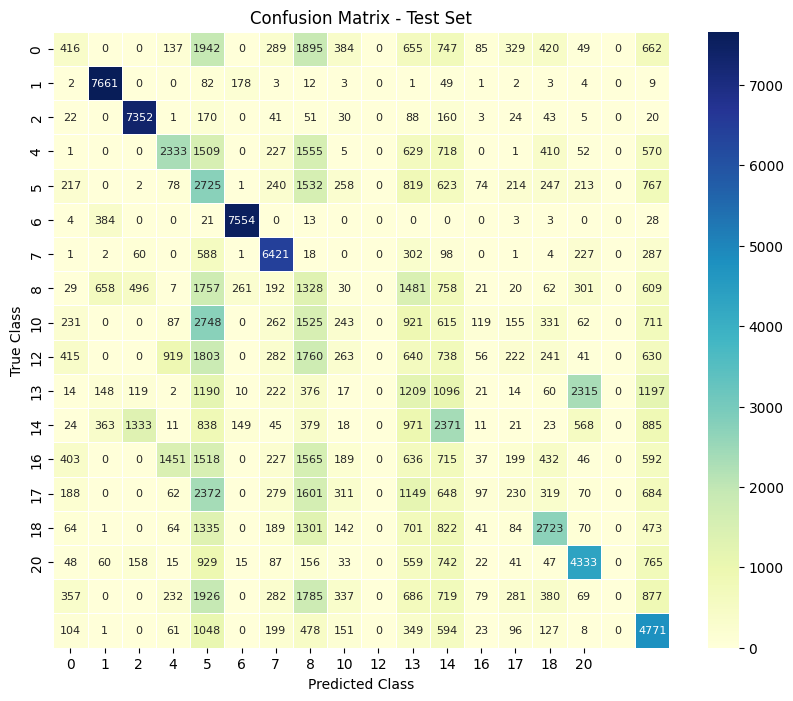

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Separate features (X) and labels (y)
X_train = NTFT500_train_features  
y_train = NTFT500_train_lable   
X_test = NTFTS50_test_features 
y_test = NTFTS50_test_lable

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=.5, square=True,
            xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred),
            annot_kws={"size": 8})
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### KNN Classifier 


Test Accuracy: 0.6204327923429047
Confusion Matrix (Test):
[[5315    0    5  186   52    0    0    0  206   71    0    1    0  420
    41    0  651 1062]
 [  56 7893    0    0    2    0    0   11    6    0    0    0    0    6
     0    0   12   24]
 [  95    0 7853    3    0    0    0    0    6    1    0    0    0    9
     0    0   18   25]
 [2087    0    3 4298   27    0    0    2   92   50    0    0    0  175
    22    0  485  769]
 [3264    0    1  115 2729    0    0    1  220   39    9    1    0  327
    29    1  462  812]
 [  23    0    0    1    0 7965    0    0    2    1    0    0    0    2
     0    0    7    9]
 [  12    0    0    1    0    0 7988    0    1    0    0    0    0    1
     0    0    6    1]
 [ 475  272   34   10  736    0  122 4634  401    5  798  110    0  168
     2   23   81  139]
 [3812    1    0  148  187    0    0    0 1382   37    0    1    0  961
    13    0  519  949]
 [2806    0    3 1081   33    0    0    0  126 2460    0    1  104  224
    55    1  

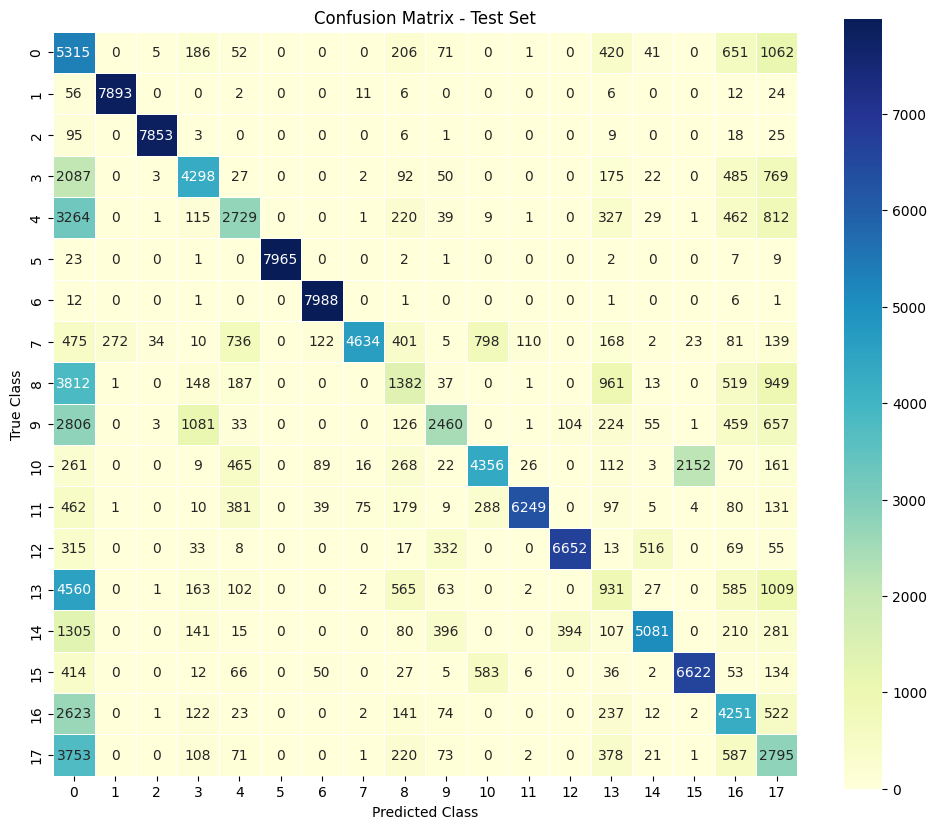

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and labels (y)
X_train = NTFT500_train_features  
y_train = NTFT500_train_lable   
X_test = NTFTS50_test_features 
y_test = NTFTS50_test_lable

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=21)

# Fit the model on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_test_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred) 
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("\nTest Accuracy:", accuracy_test)
print("Confusion Matrix (Test):")
print(conf_matrix_test)
print("Classification Report (Test):")
print(class_report_test)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=.5, square=True)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### KNN+NN


In [17]:
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Separate features (X) and labels (y)
X_train = NTFT500_train_features  
y_train = NTFT500_train_lable   
X_test = NTFTS50_test_features 
y_test = NTFTS50_test_lable

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# You need to adjust the number of clusters based on your requirements
n_clusters = 18
kmeans = KMeans(n_clusters=n_clusters)
cluster_membership_train = kmeans.fit_predict(X_train_scaled)
cluster_membership_test = kmeans.predict(X_test_scaled)

# Now, cluster_membership represents the cluster each data point belongs to
# You can use cluster_membership as a new feature for your ANN

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(n_clusters, activation='softmax')  # Output layer with n_clusters nodes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
model.fit(X_train_scaled, cluster_membership_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_test_pred_clusters = np.argmax(model.predict(X_test_scaled), axis=1)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(cluster_membership_test, y_test_pred_clusters))
print("Confusion Matrix:")
print(confusion_matrix(cluster_membership_test, y_test_pred_clusters))


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3392      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 18)                594       
                                                                 
Total params: 6066 (23.70 KB)
Trainable params: 6066 (23.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
10823/10823 [==============================] - 28s 2ms/step - loss: 0.1527 - accuracy: 0.9489 - val_loss: 0.0767 - val_accuracy: 0.9734
Epoch 2/10
10823/10823 [==============================] - 26s 2ms/step - loss: 0.0714 - accuracy: 0.9720 - val_loss: 0.0567 - val_accuracy:

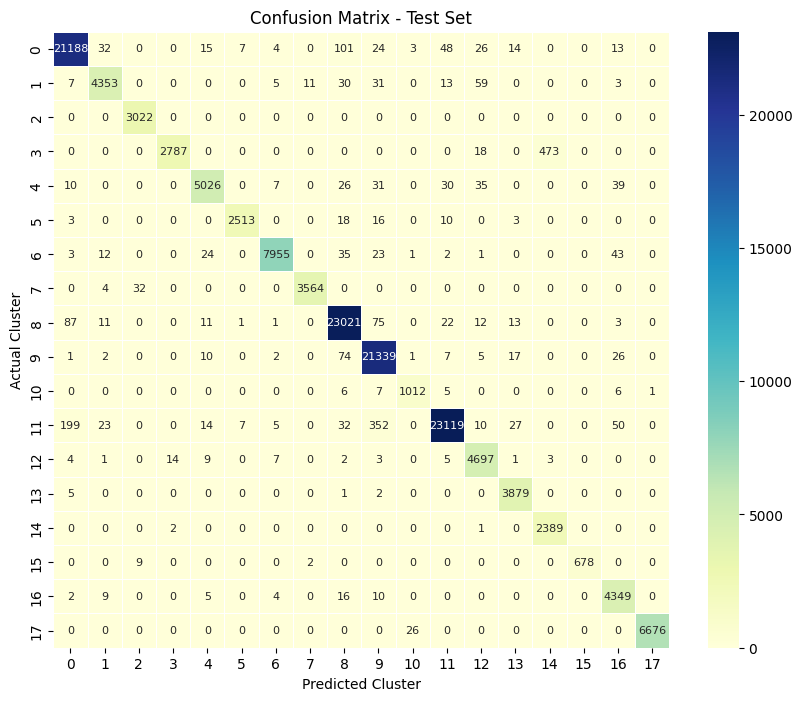

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Assuming cluster_membership_test and y_test_pred_clusters are the cluster memberships for the test set
conf_matrix = confusion_matrix(cluster_membership_test, y_test_pred_clusters)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=.5, square=True,
            xticklabels=np.unique(y_test_pred_clusters), yticklabels=np.unique(y_test_pred_clusters),
            annot_kws={"size": 8})
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Cluster')
plt.show()


### KNN + NN with loss function 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                3392      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 18)                594       
                                                                 
Total params: 6066 (23.70 KB)
Trainable params: 6066 (23.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
10823/10823 [==============================] - 27s 2ms/step - loss: 0.1544 - accuracy: 0.9481 - val_loss: 0.0831 - val_accuracy: 0.9676
Epoch 2/10
10823/10823 [==============================] - 26s 2ms/step - loss: 0.0722 - accuracy: 0.9719 - val_loss: 0.0641 - val_accurac

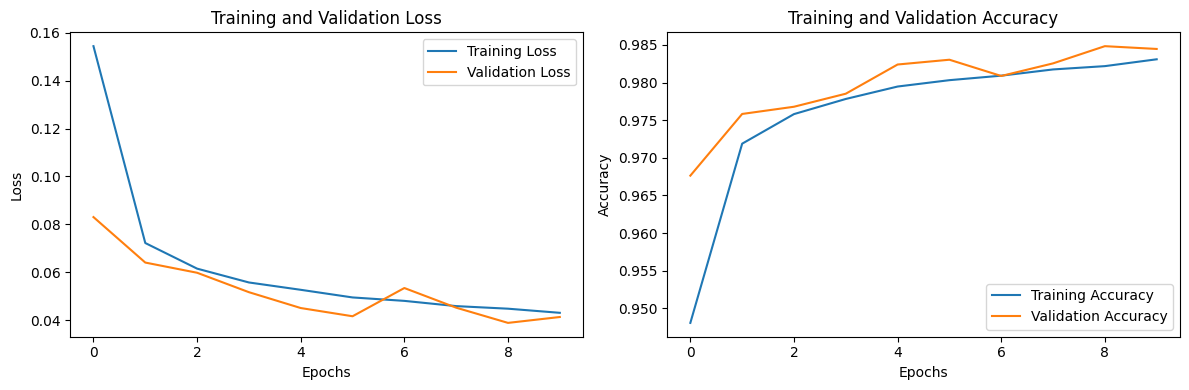

4506/4506 [==============================] - 6s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4535
           1       0.99      0.98      0.99     23839
           2       0.91      0.93      0.92      3176
           3       0.93      1.00      0.96       712
           4       0.97      0.99      0.98      2606
           5       0.97      0.98      0.98      1038
           6       0.99      0.99      0.99     23899
           7       0.98      0.96      0.97      4830
           8       1.00      0.99      0.99      3674
           9       0.98      0.99      0.99     22416
          10       1.00      1.00      1.00      6702
          11       0.97      0.96      0.97      4389
          12       0.96      0.96      0.96      3022
          13       1.00      0.99      0.99      7897
          14       0.99      1.00      0.99      2924
          15       0.93      0.99      0.96      2938
 

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Separate features (X) and labels (y)
X_train = NTFT500_train_features  
y_train = NTFT500_train_lable   
X_test = NTFTS50_test_features 
y_test = NTFTS50_test_lable

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# You need to adjust the number of clusters based on your requirements
n_clusters = 18
kmeans = KMeans(n_clusters=n_clusters)
cluster_membership_train = kmeans.fit_predict(X_train_scaled)
cluster_membership_test = kmeans.predict(X_test_scaled)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(n_clusters, activation='softmax')  # Output layer with n_clusters nodes
])

# Compile the model with Categorical Cross-Entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model and capture the history
history = model.fit(X_train_scaled, cluster_membership_train, epochs=10, batch_size=32, validation_split=0.2)

# Access and print the loss and accuracy values
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

print("Training Loss Values:")
print(loss_values)

print("Validation Loss Values:")
print(val_loss_values)

print("Training Accuracy Values:")
print(accuracy_values)

print("Validation Accuracy Values:")
print(val_accuracy_values)

# Plot the loss values
plt.figure(figsize=(12, 4))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
y_test_pred_clusters = np.argmax(model.predict(X_test_scaled), axis=1)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(cluster_membership_test, y_test_pred_clusters))
print("Confusion Matrix:")
print(confusion_matrix(cluster_membership_test, y_test_pred_clusters))



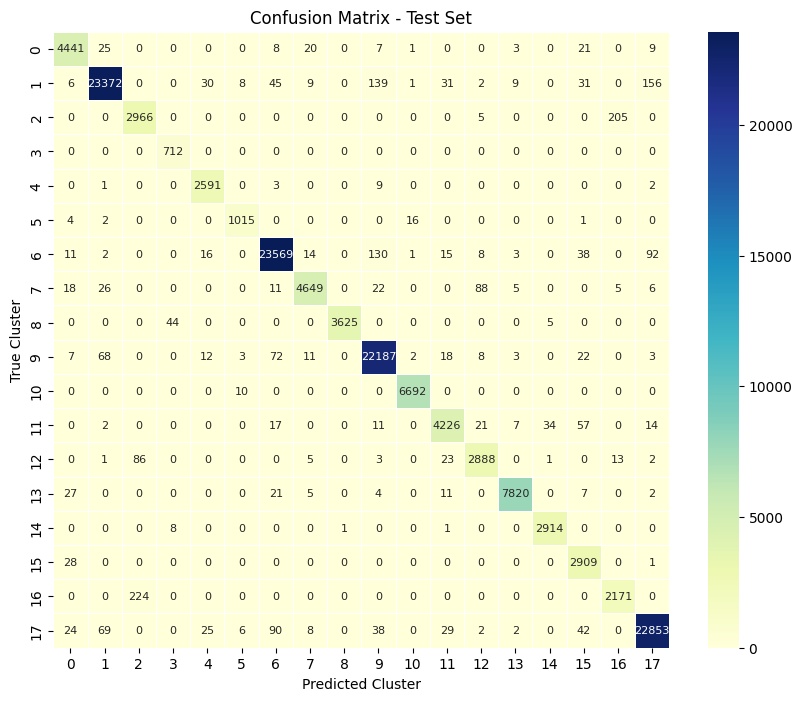

In [20]:
import seaborn as sns
# Plot the confusion matrix heatmap
conf_matrix = confusion_matrix(cluster_membership_test, y_test_pred_clusters)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=.5, square=True,
            xticklabels=np.unique(y_test_pred_clusters), yticklabels=np.unique(y_test_pred_clusters),
            annot_kws={"size": 8})
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Cluster')
plt.show()

### NN

In [21]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features (X) and labels (y)
X_train = NTFT500_train_features  
y_train = NTFT500_train_lable   
X_test = NTFTS50_test_features 
y_test = NTFTS50_test_lable

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to one-hot encoding
num_classes = 21
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
model.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_test_pred_one_hot = model.predict(X_test_scaled)
y_test_pred_classes = np.argmax(y_test_pred_one_hot, axis=1)

# Evaluate the model's performance
accuracy_test = accuracy_score(y_test, y_test_pred_classes)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_classes)
class_report_test = classification_report(y_test, y_test_pred_classes)

print("\nTest Accuracy:", accuracy_test)
print("Confusion Matrix (Test):")
print(conf_matrix_test)
print("Classification Report (Test):")
print(class_report_test)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                3392      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 21)                693       
                                                                 
Total params: 6165 (24.08 KB)
Trainable params: 6165 (24.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
10823/10823 [==============================] - 28s 3ms/step - loss: 0.5839 - accuracy: 0.8107 - val_loss: 4.4812 - val_accuracy: 0.6188
Epoch 2/10
10823/10823 [==============================] - 28s 3ms/step - loss: 0.3129 - accuracy: 0.8993 - val_loss: 5.8895 - val_accurac

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


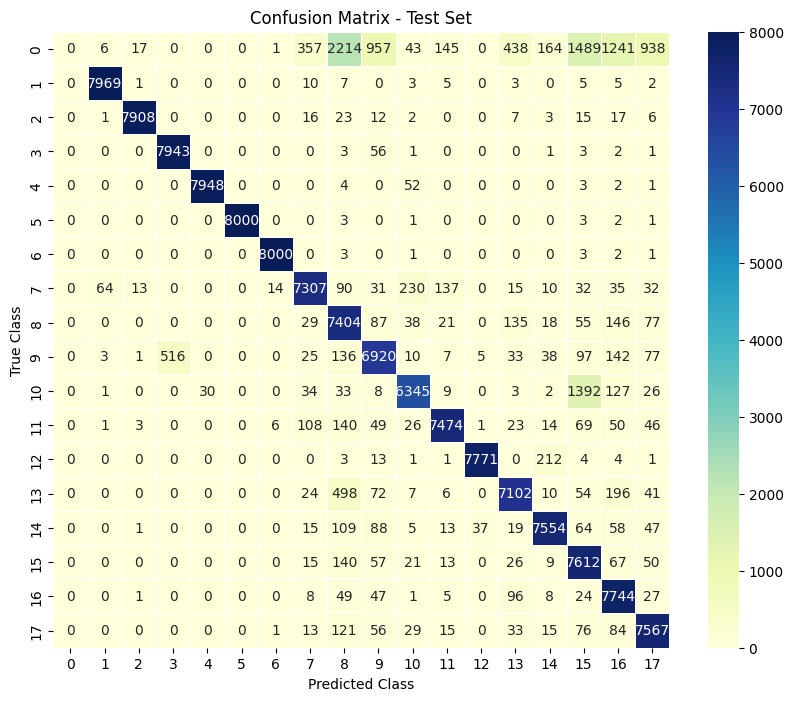

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=.5, square=True)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()